In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
base = pd.read_excel('BaseDados_RegressaoLinear.xlsx',index_col=0)
base.head()

,Salario,Limite_Emprestimo
INDICE,,
0.909144,1250.219130,2900.124323
0.536008,1262.721321,2929.125566
0.260186,1275.348535,2958.416822
0.486808,1288.102020,2988.000990
0.551902,1300.983040,3017.881000


In [79]:
base.tail()

,Salario,Limite_Emprestimo
INDICE,,
0.862964,3185.629581,7279.937858
0.014223,3217.485877,7315.799621
0.603589,3249.660736,7351.661384
0.407157,3282.157343,7387.523147
0.777109,3314.978916,7423.384910


In [80]:
base.columns

Index(['Salario', 'Limite_Emprestimo'], dtype='object')

In [81]:
base.shape

(99, 2)

In [82]:
base.describe()

,Salario,Limite_Emprestimo
count,99.000000,99.000000
mean,2119.100581,4900.652060
std,600.832983,1378.113961
min,1250.219130,2900.124323
25%,1595.383780,3700.800280
50%,2035.792243,4722.412623
75%,2597.840528,6026.191986
max,3314.978916,7423.384910


In [83]:
def eixo_x_array(base):
    eixo_x = base.iloc[:,0].values
    return eixo_x

def eixo_y_array(base):
    return np.array(base.iloc[:,1])

def grafico_dispersao(funcaoX,funcaoY,base, titulo, titulo_x, titulo_y):
    plt.figure(figsize=(10,5))
    plt.scatter(funcaoX,funcaoY)
    plt.title(titulo)
    plt.xlabel(titulo_x)
    plt.ylabel(titulo_y)
    plt.show()

def x_matriz(base):
    eixo_x = base.reshape(-1,1)
    return eixo_x

def y_matriz(base):
    eixo_y = base.reshape(-1,1)
    return eixo_y

def divisao_base_treino_teste(x,y):
    from sklearn.model_selection import train_test_split
    x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.20,random_state=0)
    return x_treino, x_teste, y_treino, y_teste

def regressao_linear(x,y):
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(x,y)
    return regressor

def metricas(x,y,regressor):
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
    previsao = regressor.predict(x)
    r2 = r2_score(y,previsao)
    mae = mean_absolute_error(y,previsao)
    mse = mean_squared_error(y,previsao)
    rmse = np.sqrt(mse)
    return r2, mae, mse, rmse

In [84]:
Eixo_x = eixo_x_array(base)
Eixo_y = eixo_y_array(base)

In [85]:
Eixo_x, Eixo_y

(array([1250.21913   , 1262.7213213 , 1275.34853451, 1288.10201986,
        1300.98304006, 1313.99287046, 1327.13279916, 1340.40412715,
        1353.80816843, 1367.34625011, 1381.01971261, 1394.82990974,
        1408.77820883, 1422.86599092, 1437.09465083, 1451.46559734,
        1465.98025331, 1480.64005585, 1495.4464564 , 1510.40092097,
        1525.50493018, 1540.75997948, 1556.16757927, 1571.72925507,
        1587.44654762, 1603.32101309, 1619.35422323, 1635.54776546,
        1651.90324311, 1668.42227554, 1685.1064983 , 1701.95756328,
        1718.97713891, 1736.1669103 , 1753.52857941, 1771.0638652 ,
        1788.77450385, 1806.66224889, 1824.72887138, 1842.97616009,
        1861.4059217 , 1880.01998091, 1898.82018072, 1917.80838253,
        1936.98646635, 1956.35633102, 1975.91989433, 1995.67909327,
        2015.6358842 , 2035.79224305, 2056.15016548, 2076.71166713,
        2097.4787838 , 2118.45357164, 2139.63810736, 2161.03448843,
        2182.64483331, 2204.47128165, 2226.51599

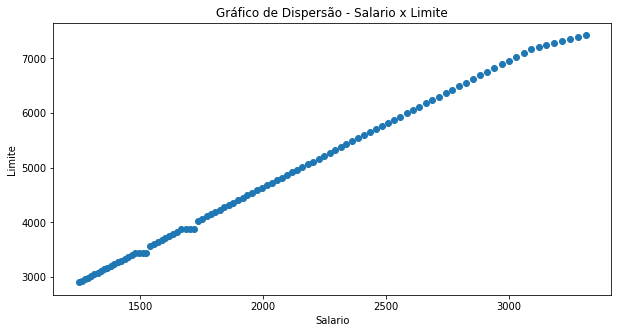

In [86]:
grafico_dispersao(eixo_x_array(base),eixo_y_array(base),base, 'Gráfico de Dispersão - Salario x Limite', 'Salario', 'Limite')

In [87]:
base.corr()

,Salario,Limite_Emprestimo
Salario,1.000000,0.999498
Limite_Emprestimo,0.999498,1.000000


In [88]:
(xtr,xte,ytr,yte) = divisao_base_treino_teste(x_matriz(Eixo_x),y_matriz(Eixo_y))

In [89]:
len(xtr), len(xte), len(ytr), len(yte)

(79, 20, 79, 20)

In [90]:
r = regressao_linear(xtr,ytr)
r


LinearRegression()

In [91]:
r.score(xtr,ytr)

0.9987588543176282

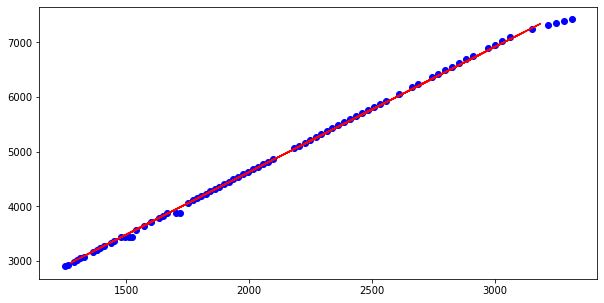

In [92]:
plt.figure(figsize=(10,5))
plt.scatter(xtr,ytr,color='blue')
plt.plot(xte,r.predict(xte),color='red');

In [93]:
metricas(xte,yte,r)

(0.9997111684231244, 19.065467924656765, 658.3464505150492, 25.65826281171524)

In [96]:
print (r.predict([[1262]]))

[[2937.30962108]]


In [99]:
base['Limite_Previsto'] = r.predict(x_matriz(Eixo_x))
base['Diferemca'] = base['Limite_Emprestimo'] - base['Limite_Previsto']

In [101]:
base.head(30)

,Salario,Limite_Emprestimo,Limite_Previsto,Diferemca
INDICE,,,,
0.909144,1250.219130,2900.124323,2910.340207,-10.215884
0.536008,1262.721321,2929.125566,2938.960909,-9.835343
0.260186,1275.348535,2958.416822,2967.867819,-9.450997
0.486808,1288.102020,2988.000990,2997.063798,-9.062808
0.551902,1300.983040,3017.881000,3026.551737,-8.670737
0.876431,1313.992870,3048.059810,3056.334555,-8.274745
0.621566,1327.132799,3078.540408,3086.415201,-7.874793
0.369229,1340.404127,3109.325812,3116.796654,-7.470842
0.730584,1353.808168,3140.419070,3147.481922,-7.062851


In [102]:
base.describe()

,Salario,Limite_Emprestimo,Limite_Previsto,Diferemca
count,99.000000,99.000000,99.000000,99.000000
mean,2119.100581,4900.652060,4899.431337,1.220722
std,600.832983,1378.113961,1375.459858,43.717304
min,1250.219130,2900.124323,2910.340207,-213.716780
25%,1595.383780,3700.800280,3700.510078,-5.175278
50%,2035.792243,4722.412623,4708.717314,10.104128
75%,2597.840528,6026.191986,5995.389112,25.482703
max,3314.978916,7423.384910,7637.101690,45.842244
